# Homework 2

* Date Assigned: 9/9
* Date Due: 9/16 @ 19:00
---

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

np.random.seed(0)

Using TensorFlow backend.


### Load MNIST Dataset

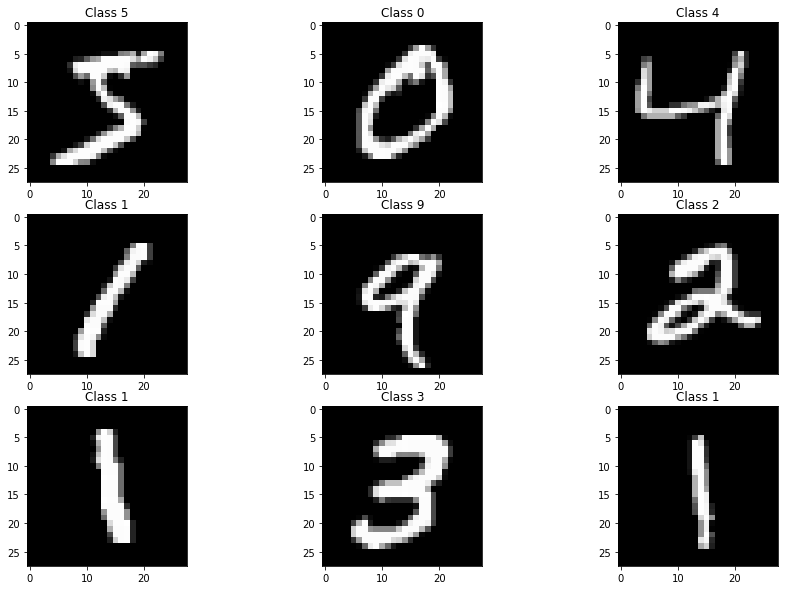

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(15,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
plt.show()

In [6]:
def show_img(img, label):
    img = img.reshape(28,28)
    
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    
    if type(label) == np.uint8:
        zeros = np.zeros(10)
        zeros[label] = 1
        label = zeros
    
    plt.subplot(1, 2, 2)
    plt.bar(np.arange(10), label, tick_label=np.arange(10))
    plt.show()

### Show Image

In [7]:
X = x_train[0]; Y = y_train[0]
zeros = np.zeros(10); zeros[Y] = 1
Y = zeros

# Forward pass for a single example
Here we implement the forward pass for the network using the single example, $X$, from above

### Initialize weights

$d = 784; h = 200; c = 10$

\begin{align}
    \theta^{(1)} &= \begin{bmatrix}
       \theta_{11} & ... & \theta_{1h} \\
       \theta_{21} & ... & \theta_{2h}\\
       \vdots & \vdots & \vdots \\
       \theta_{d1} & ... & \theta_{dh}
     \end{bmatrix} 
    &
    \theta^{(2)} &= \begin{bmatrix}
       \theta_{11} & ... & \theta_{1c} \\
       \theta_{21} & ... & \theta_{2c}\\
       \vdots & \vdots & \vdots \\
       \theta_{h1} & ... & \theta_{hc}
     \end{bmatrix}
   \end{align}

**Question:** what is the shape of the first layer weights?  
**Answer:**

**Question:** what is the shape of the second layer weights?  
**Answer:**

In [ ]:
W1 = # create weights for the first layer
W2 = # create weights for the second layer

### First layer activations
\begin{equation}
    Z^{(1)} = X^{(1)} \theta^{(1)} 
\end{equation} 
\begin{equation}
    X^{(2)} = \phi_1 ( Z^{(1)} )
\end{equation}

In [ ]:
Z1 = # multiply input with weights

def phi_1(z):
    return # activation

X2 = # activation function of Z1

### Second layer activations
\begin{equation}
    Z^{(2)} = X^{(2)} \theta^{(2)} 
\end{equation} 

In [ ]:
Z2 = # 

### Softmax Equation
\begin{equation}
    \hat{Y_i} = \frac{e^{z_{i}}}{\sum_{j=1}^{c}e^{z_{j}}}
\end{equation} 

In [ ]:
# softmax
def phi_2(z):
    # subracting the max adds numerical stability
    shiftx = z - np.max(z)
    exps = np.exp(shiftx)
    return exps / np.sum(exps)

Y_hat = #

# Backward pass for single example

\begin{equation}
    J(\theta) = - [Y \log \hat{Y} + (1-Y) \log(1-\hat{Y})]
\end{equation} 
\begin{equation}
    \frac{\partial J}{\partial Z^{(2)}} = \frac{\partial J}{\partial \hat{Y}} \frac{\partial \hat{Y}}{\partial Z^{(2)}} = \hat{Y} - Y
\end{equation}

\begin{equation}
   \frac{\partial J}{\partial \theta^{(2)}} = \frac{\partial J}{\partial \hat{Y}} \frac{\partial \hat{Y}}{\partial Z^{(2)}} \frac{\partial Z^{(2)}}{\partial \theta^{(2)}} = (Y-\hat{Y}) X^{(2)}
\end{equation}  

\begin{equation}
    \frac{\partial J}{\partial \theta^{(1)}} = \frac{\partial J}{\partial \hat{Y}} \frac{\partial \hat{Y}}{\partial Z^{(2)}} \frac{\partial Z^{(2)}}{\partial X^{(2)}} \frac{\partial X^{(2)}}{\partial Z^{(1)}} \frac{\partial Z^{(1)}}{\partial \theta^{(1)}}
    = (Y-\hat{Y}) \theta^{(2)} \phi_1'(Z^{(1)}) X^1
\end{equation}

# Define Neural Network Class

In [8]:
class NeuralNetwork:
    def __init__(self, num_hidden_nodes, num_classes, lr=0.001):
        # set learning rate
        self.lr = lr
        
        # init layer 1 weights
        self.W1 = 
        self.b1 = 
        
        # init layer 2 weights
        self.W2 = 
        self.b2 = 
        
        # set activation function
        self.phi_1 = 
        self.phi_2 = 
        
        # set derivative of activation functions
        self.d_phi_1 = 
        self.d_phi_2 = 
        
    def d_softmax(self, g):
        # derivative of softmax
        return 
    
    def softmax(self, z):
        # softmax
        return 
    
    def sigmoid(self, z):
        # sigmoid
        return 
    
    def d_sigmoid(self, g):
        # derivative of sigmoid
        return 
    
    def forward(self, X1):
        '''
        Forward pass through the network
        
        INPUT
            X: input to network
                shape: (?, 784)
        
        RETURN
            Y_hat: prediction from output of network 
                shape: (?, 10)
        '''
        # store input for backward pass
        
        # compute layer one 
        
        # second layer activations
        
        # predictions

        return self.Y_hat
    
    def backward(self, Y_hat, Y):
        '''
        Backward pass through network. Update parameters 
        
        INPUT
            Y_hat: Network predicted 
                shape: (?, 10)
            
            Y: Correct target
                shape: (?, 10)
            
        RETURN 
            cost: calculate J for errors 
                type: (float)
            
        '''
        cost = 
        # dJ/dZ2 
        dJ_dZ2 = 
        
        # dJ/dW2 = dJ/dZ2 * dZ2/dW2
        dJ_dW2 = 
        dJ_db2 = 
        
        # dZ2/dX2 = dJ/dZ2 * dZ2/dX2
        dZ2_dX2 = 

        # dX2/dZ1 = dZ2/dX2 * dX2/dZ1
        dX2_dZ1 = 

        # dJ/dW1 = dJ/d * 
        dJ_dW1 = 
        dJ_db1 = 
        
        # perform weight updates
        self.W1 -= 
        self.b1 -= 
        self.W2 -= 
        self.b2 -= 
        
        return cost

In [9]:
nn = NeuralNetwork(200,10,lr=.01)
num_train = float(len(x_train)); num_test = float(len(x_test))

for epoch in range(10):
    train_correct = 0; train_cost = 0
    # training loop
    for x,y in zip(x_train, y_train):
        # standardizing input to range 0 to 1
        X = x.reshape(1,784) /255.
        
        # forward pass through network
        Y_hat = nn.forward(X)

        # get pred number
        pred_num = np.argmax(Y_hat)
        
        # check if prediction was accurate
        if pred_num == y:
            train_correct += 1
            
        zeros = np.zeros(10); zeros[y] = 1
        Y = zeros
        
        # compute gradients and update weights
        train_cost += nn.backward(Y_hat, Y)
    
    test_correct = 0
    # validation loop
    for x,y in zip(x_test, y_test):
        # standardizing input to range 0 to 1
        X = x.reshape(1,784) /255.
        
        # forward pass
        Y_hat = nn.forward(X)
        
        # get pred number
        pred_num = np.argmax(Y_hat)
        
        # check if prediction was correct
        if pred_num == y:
            test_correct += 1
            
        # no backward pass here!
        
    # compute average metrics for train and test
    train_correct = round(100*(train_correct/num_train), 2)
    test_correct = round(100*(test_correct/num_test ), 2)
    train_cost = round( train_cost/num_train, 2)
    
    # print status message every epoch
    log_message = 'Epoch: {}, Train Accuracy: {}%, Train Cost: {}, Test Accuracy: {}%'.format(epoch, train_correct, train_cost, test_correct)
    print log_message

Epoch: 0, Train Accuracy: 40.24%, Train Cost: 2.43, Test Accuracy: 78.43%
Epoch: 1, Train Accuracy: 84.62%, Train Cost: 0.86, Test Accuracy: 86.6%
Epoch: 2, Train Accuracy: 88.65%, Train Cost: 0.66, Test Accuracy: 88.58%
Epoch: 3, Train Accuracy: 89.81%, Train Cost: 0.59, Test Accuracy: 89.86%
Epoch: 4, Train Accuracy: 90.37%, Train Cost: 0.55, Test Accuracy: 90.67%
Epoch: 5, Train Accuracy: 90.75%, Train Cost: 0.53, Test Accuracy: 90.85%
Epoch: 6, Train Accuracy: 91.03%, Train Cost: 0.52, Test Accuracy: 91.12%
Epoch: 7, Train Accuracy: 91.25%, Train Cost: 0.51, Test Accuracy: 91.32%
Epoch: 8, Train Accuracy: 91.46%, Train Cost: 0.5, Test Accuracy: 91.51%
Epoch: 9, Train Accuracy: 91.62%, Train Cost: 0.49, Test Accuracy: 91.59%


**Hint:** You should get above 90% test accuracy


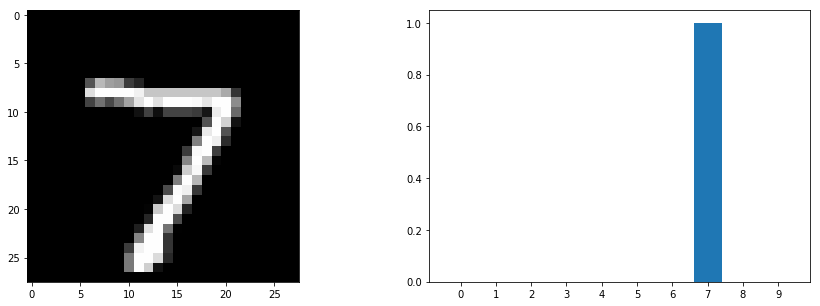

In [10]:
X = x_test[0].reshape(1,784)
Y_hat = nn.forward(X)[0]

show_img(X,Y_hat)